 ## S03T01_Exploracio de les dades_s6

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [13]:
delayedFlights = pd.read_csv('DelayedFlights.csv')
delayedFlights.head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [14]:
airlines = pd.read_csv('airlines.csv') 
airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [15]:
old_col_names = list(airlines.columns)
new_col_names = ["UniqueCarrier","NOM_AEROLINIA"]

replace = dict(zip(old_col_names, new_col_names))
airlines.rename(columns=replace, inplace=True)
airlines.sample(3)

,UniqueCarrier,NOM_AEROLINIA
12,MQ,American Eagle Airlines Inc.
7,NK,Spirit Air Lines
2,US,US Airways Inc.


In [16]:
df = pd.merge(delayedFlights, airlines, on='UniqueCarrier')

In [17]:
df.head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NOM_AEROLINIA
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.


In [18]:
print(df.head())

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiOut Cancelled  \
0   2211.0        2225            WN  ...      8.0         0   
1   1002.0        1000            WN  ...     10.0         0   
2    804.0         750            WN  ...     17.0         0   
3   1959.0        1925            WN  ...     10.0         0   
4   2121.0        2110            WN  ...     10.0         0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay  NASDelay  \
0                 N         0           NaN           NaN       NaN   
1                 N         

In [19]:
df['UniqueCarrierwithNOM_AEROLINIA'] = df['UniqueCarrier'] + "-" + df['NOM_AEROLINIA']


In [20]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'NOM_AEROLINIA', 'UniqueCarrierwithNOM_AEROLINIA'],
      dtype='object')

In [21]:
df.count()

Unnamed: 0                        1410153
Year                              1410153
Month                             1410153
DayofMonth                        1410153
DayOfWeek                         1410153
DepTime                           1410153
CRSDepTime                        1410153
ArrTime                           1405082
CRSArrTime                        1410153
UniqueCarrier                     1410153
FlightNum                         1410153
TailNum                           1410153
ActualElapsedTime                 1404146
CRSElapsedTime                    1410150
AirTime                           1404146
ArrDelay                          1404146
DepDelay                          1410153
Origin                            1410153
Dest                              1410153
Distance                          1410153
TaxiIn                            1405082
TaxiOut                           1409868
Cancelled                         1410153
CancellationCode                  

In [22]:
df["UniqueCarrier"].tail(153)

1410000    B6
1410001    B6
1410002    B6
1410003    B6
1410004    B6
           ..
1410148    B6
1410149    B6
1410150    B6
1410151    B6
1410152    B6
Name: UniqueCarrier, Length: 153, dtype: object

In [23]:
df["UniqueCarrierwithNOM_AEROLINIA"].tail(153)

1410000    B6-JetBlue Airways
1410001    B6-JetBlue Airways
1410002    B6-JetBlue Airways
1410003    B6-JetBlue Airways
1410004    B6-JetBlue Airways
                  ...        
1410148    B6-JetBlue Airways
1410149    B6-JetBlue Airways
1410150    B6-JetBlue Airways
1410151    B6-JetBlue Airways
1410152    B6-JetBlue Airways
Name: UniqueCarrierwithNOM_AEROLINIA, Length: 153, dtype: object

In [24]:
df.dtypes

Unnamed: 0                          int64
Year                                int64
Month                               int64
DayofMonth                          int64
DayOfWeek                           int64
DepTime                           float64
CRSDepTime                          int64
ArrTime                           float64
CRSArrTime                          int64
UniqueCarrier                      object
FlightNum                           int64
TailNum                            object
ActualElapsedTime                 float64
CRSElapsedTime                    float64
AirTime                           float64
ArrDelay                          float64
DepDelay                          float64
Origin                             object
Dest                               object
Distance                            int64
TaxiIn                            float64
TaxiOut                           float64
Cancelled                           int64
CancellationCode                  

In [25]:
sns.set_style('darkgrid')

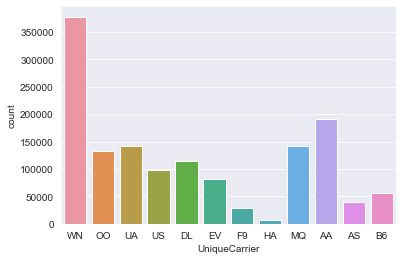

In [26]:
# Visualización de una variable categorica
sns.countplot(x="UniqueCarrier", data=df)
plt.show() # para que no salgan los datos del gráfico

In [27]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.410153e+06,1410153.0,1.410153e+06,1.410153e+06,1.410153e+06,1.410153e+06,1.410153e+06,1.405082e+06,1.410153e+06,1.410153e+06,...,1.410153e+06,1.405082e+06,1.409868e+06,1.410153e+06,1.410153e+06,888877.000000,888877.000000,888877.000000,888877.000000,888877.000000
mean,3.348277e+06,2008.0,6.138669e+00,1.576204e+01,3.995467e+00,1.519046e+03,1.469820e+03,1.608590e+03,1.632101e+03,2.052555e+03,...,7.801364e+02,6.481087e+00,1.718139e+01,2.857846e-04,3.974037e-03,17.887014,3.172266,13.932609,0.080643,26.790314
std,2.074050e+06,0.0,3.495356e+00,8.776049e+00,1.997689e+00,4.492118e+02,4.236442e+02,5.481591e+02,4.683609e+02,1.782946e+03,...,5.902995e+02,5.156019e+00,1.355361e+01,1.690275e-02,6.291460e-02,40.539774,19.813128,31.747849,1.916893,41.447098
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.498513e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.090000e+02,...,3.370000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.253345e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.714000e+03,1.705000e+03,1.479000e+03,...,6.120000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,3.000000,0.000000,1.000000,0.000000,13.000000
75%,5.042174e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.820000e+03,2.030000e+03,2.014000e+03,3.429000e+03,...,1.013000e+03,7.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,20.000000,0.000000,13.000000,0.000000,36.000000
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.002000e+03,...,4.502000e+03,2.070000e+02,4.220000e+02,1.000000e+00,1.000000e+00,1707.000000,1352.000000,1357.000000,392.000000,1316.000000


In [28]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'NOM_AEROLINIA', 'UniqueCarrierwithNOM_AEROLINIA'],
      dtype='object')

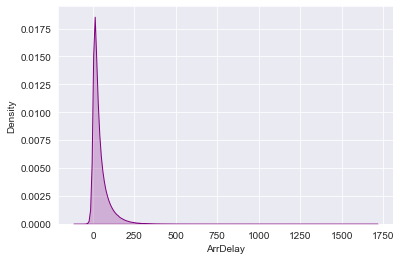

<Figure size 432x288 with 0 Axes>

In [51]:
#  Visualización de una variable numérica
sns.kdeplot(df['ArrDelay'], shade=True,color='purple') 
plt.show()
plt.savefig('grafica1.png')


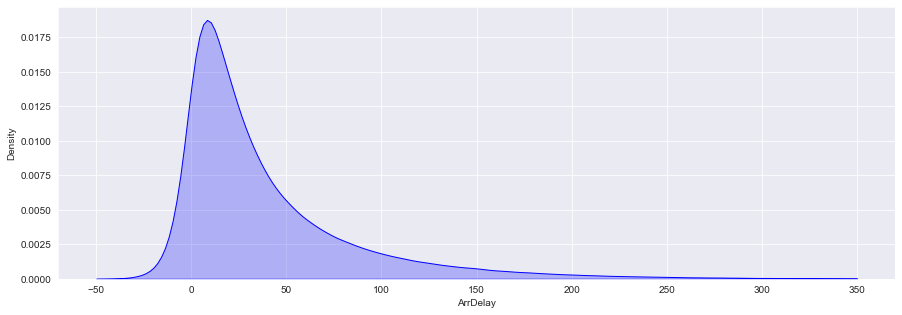

In [30]:
#  Visualización de una variable numérica (2)
plt.figure(figsize =(15, 5))
sns.kdeplot(df.ArrDelay, shade=True,  clip=(-50,350), color='blue') 
plt.show()

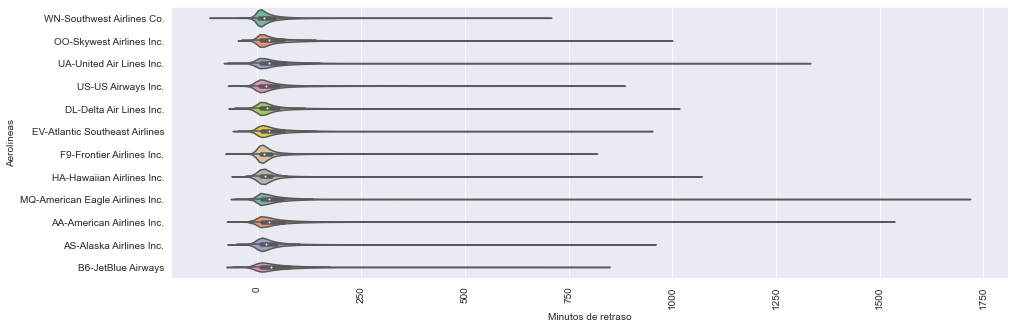

In [31]:
#  Visualización de una numérica y una categórica
plt.figure(figsize =(15, 5))
sns.violinplot(  x=df["ArrDelay"], y=df["UniqueCarrierwithNOM_AEROLINIA"], scale='area', palette="Set2", )
plt.xlabel("Minutos de retraso")
plt.ylabel("Aerolíneas")
plt.xticks(rotation='vertical')

plt.show()

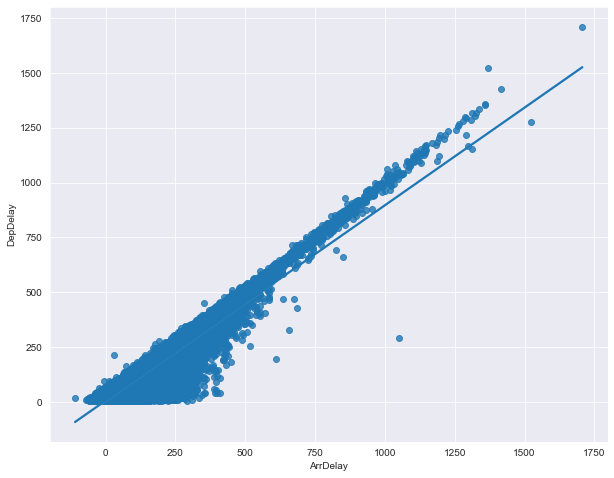

In [41]:
#  Visualización de dos variables numérica (ArrDelay y DepDelay)
data = df[["DepDelay", "ArrDelay"]].copy()

plt.figure(figsize =(10, 8))

sns.regplot(x=df["ArrDelay"], y=df["DepDelay"])
plt.show()

In [ ]:
print(df['ArrDelay'].value_counts())

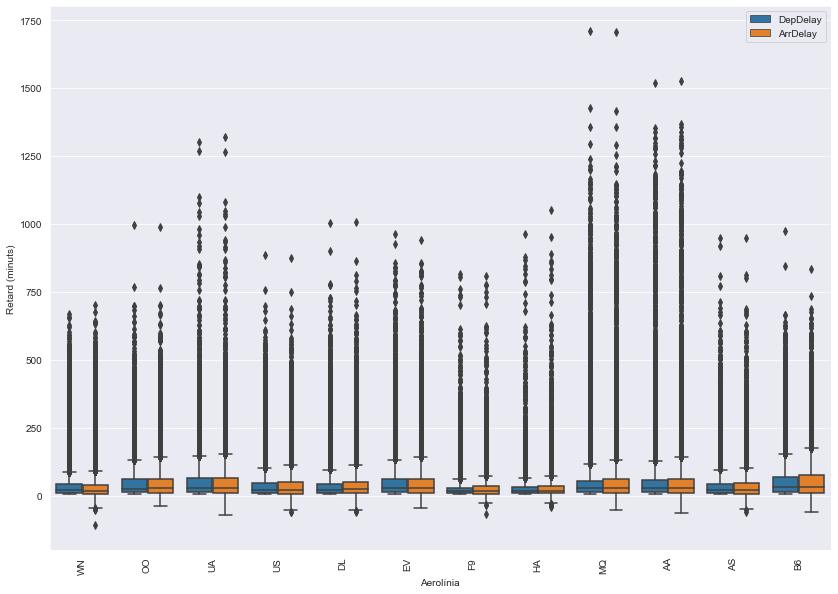

In [33]:
# Visualización de tres variables numérica (ArrDelay, DepDelay y UniqueCarrier)

titol = "Boxplots dels retards de sortida i arribada per aerolínia"

delay_df = df[['UniqueCarrier', 'DepDelay']].copy()
delay_df.rename(columns={'DepDelay': 'retraso'}, inplace = True)
delay_df['TIPUS'] = "DepDelay"
arr_df = df[['UniqueCarrier', 'ArrDelay']].copy()
arr_df.rename(columns={'ArrDelay': 'retraso'}, inplace = True)
arr_df['TIPUS'] = "ArrDelay"
data = pd.concat([delay_df, arr_df])
del delay_df, arr_df
data.dropna(inplace=True)

plt.figure(figsize =(14, 10))
sns.boxplot(x=data["UniqueCarrier"], y=data["retraso"], hue=data["TIPUS"], )
plt.xlabel("Aerolínia")
plt.ylabel("Retard (minuts)")
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')

plt.show()

In [34]:
import joypy


<Figure size 1080x720 with 0 Axes>

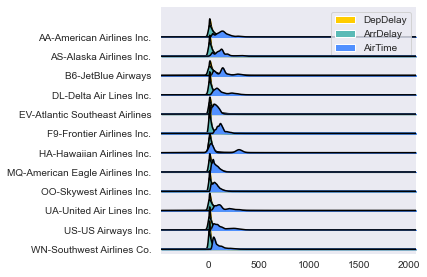

In [50]:
data = df[["UniqueCarrierwithNOM_AEROLINIA", "DepDelay", "ArrDelay", "AirTime"]].copy()
data.dropna(inplace=True)
plt.figure(figsize =(15, 10))
fig, ax = joypy.joyplot(data=data, column=['DepDelay', 'ArrDelay', 'AirTime'], by="UniqueCarrierwithNOM_AEROLINIA", 
                           legend=True, color=['#ffcc00', '#5abab6', '#5190ff'])

plt.show()
fig.savefig("grafica_6.png")


In [31]:
df.count()["UniqueCarrier"]

1410153

In [17]:
df.shape

(1410153, 32)

In [13]:
x  = df['UniqueCarrierwithNOM_AEROLINIA']
y = df['Cancelled']

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
plt.bar(x)
plt.show()

In [17]:
df['NOM_AEROLINIA'].head(5)

0    Southwest Airlines Co.
1    Southwest Airlines Co.
2    Southwest Airlines Co.
3    Southwest Airlines Co.
4    Southwest Airlines Co.
Name: NOM_AEROLINIA, dtype: object

In [19]:
freq = df.groupby(['NOM_AEROLINIA']).count() 


In [24]:
x = df['UniqueCarrierwithNOM_AEROLINIA']
y = freq

In [ ]:
plt.hist(df[UniqueCarrierwithNOM_AEROLINIA])